In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
glass = pd.read_csv('/Users/anupprakash/Documents/Assignments/KNN/Glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape

(214, 10)

In [5]:
ss = StandardScaler().fit(glass.drop('Type',1))

In [6]:
data = ss.transform(glass.drop('Type',1))

In [7]:
data = pd.DataFrame(data,columns = glass.columns[:-1])

In [8]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [9]:
data['Type'] = glass.Type

In [10]:
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
5,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150,1
6,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451,1
7,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451,1
8,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451,1
9,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111,1


In [11]:
#sns.pairplot(data= data)

plt.show()

In [12]:
xTrain,xTest, yTrain,yTest = train_test_split(data.drop('Type',1),data.Type,test_size=0.2)

In [13]:
XTrain,XTest, YTrain,YTest = train_test_split(data.drop('Type',1),data.Type,test_size=0.2)

In [14]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [15]:
dt = dt.fit(xTrain,yTrain)

In [16]:
yPred = dt.predict(xTest)

In [17]:
NormPred = pd.DataFrame({'Actual':yTest,'Predicted':yPred})

In [18]:
print(accuracy_score(yTest,yPred))

0.8372093023255814


In [19]:
# Now making model with Non - Normalize data

In [20]:
dt1 = DecisionTreeClassifier(criterion= 'entropy')

In [21]:
dt1 = dt1.fit(XTrain,YTrain)

In [22]:
ypred = dt1.predict(XTest)

In [23]:
Pred = pd.DataFrame({'Actual':YTest,'Predicted':ypred})

In [24]:
print(accuracy_score(YTest,ypred))

0.7209302325581395


In [25]:
corr = data.corr()

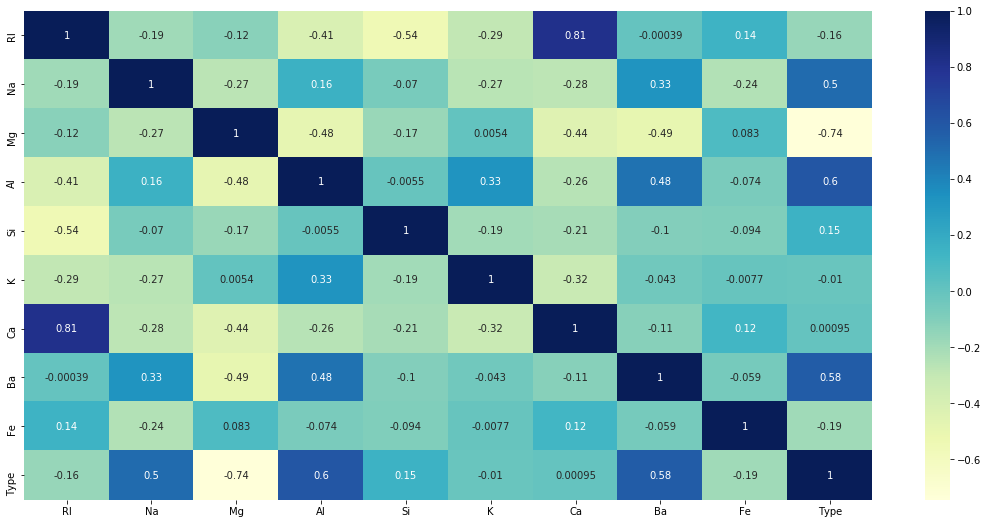

In [26]:
plt.figure(figsize= (19,9))

sns.heatmap(data= corr,annot=True,cmap='YlGnBu')

plt.show()

In [27]:
# Correlated with Tyep = Ba, Al, Na

In [28]:
da = data[['Ba','Al','Na','Ca','RI']]


In [29]:
xTrain,xTest, yTrain,yTest = train_test_split(da,data.Type,test_size=0.2)

In [30]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [31]:
dt = dt.fit(xTrain,yTrain)

In [32]:
pred = dt.predict(xTest)

In [33]:
print(accuracy_score(yTest,pred))

0.7209302325581395


In [34]:
print(confusion_matrix(yTest,yPred))

[[ 4 10  0  2  0  1]
 [ 5  8  1  2  0  1]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  0  0]
 [ 1  1  0  0  0  1]
 [ 1  1  1  0  0  0]]


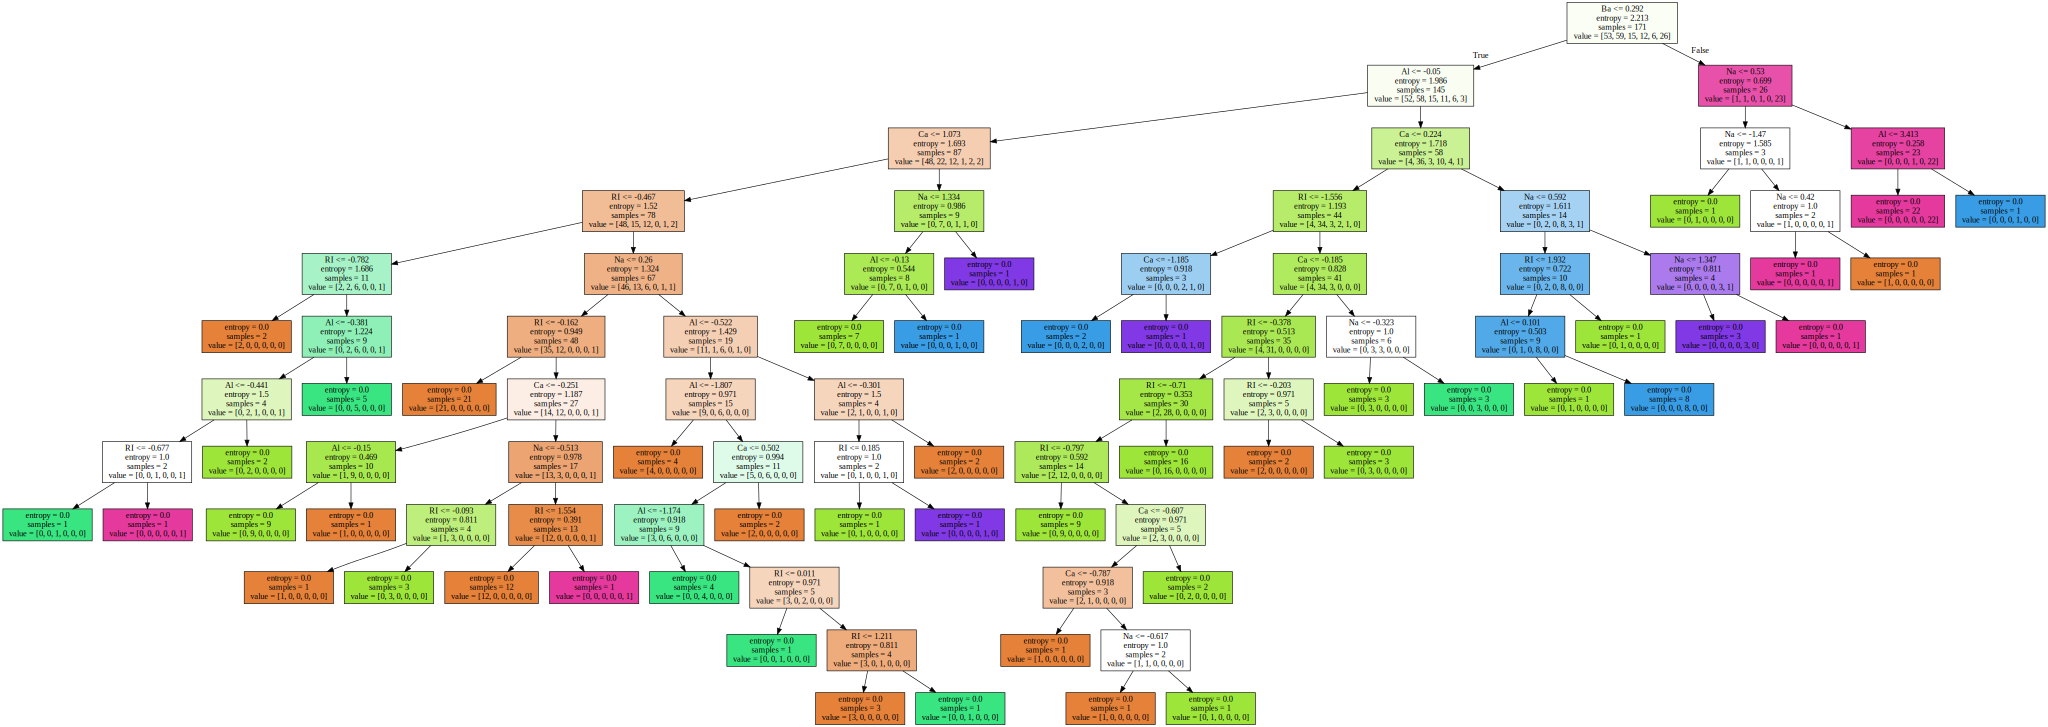

In [68]:
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=xTrain.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

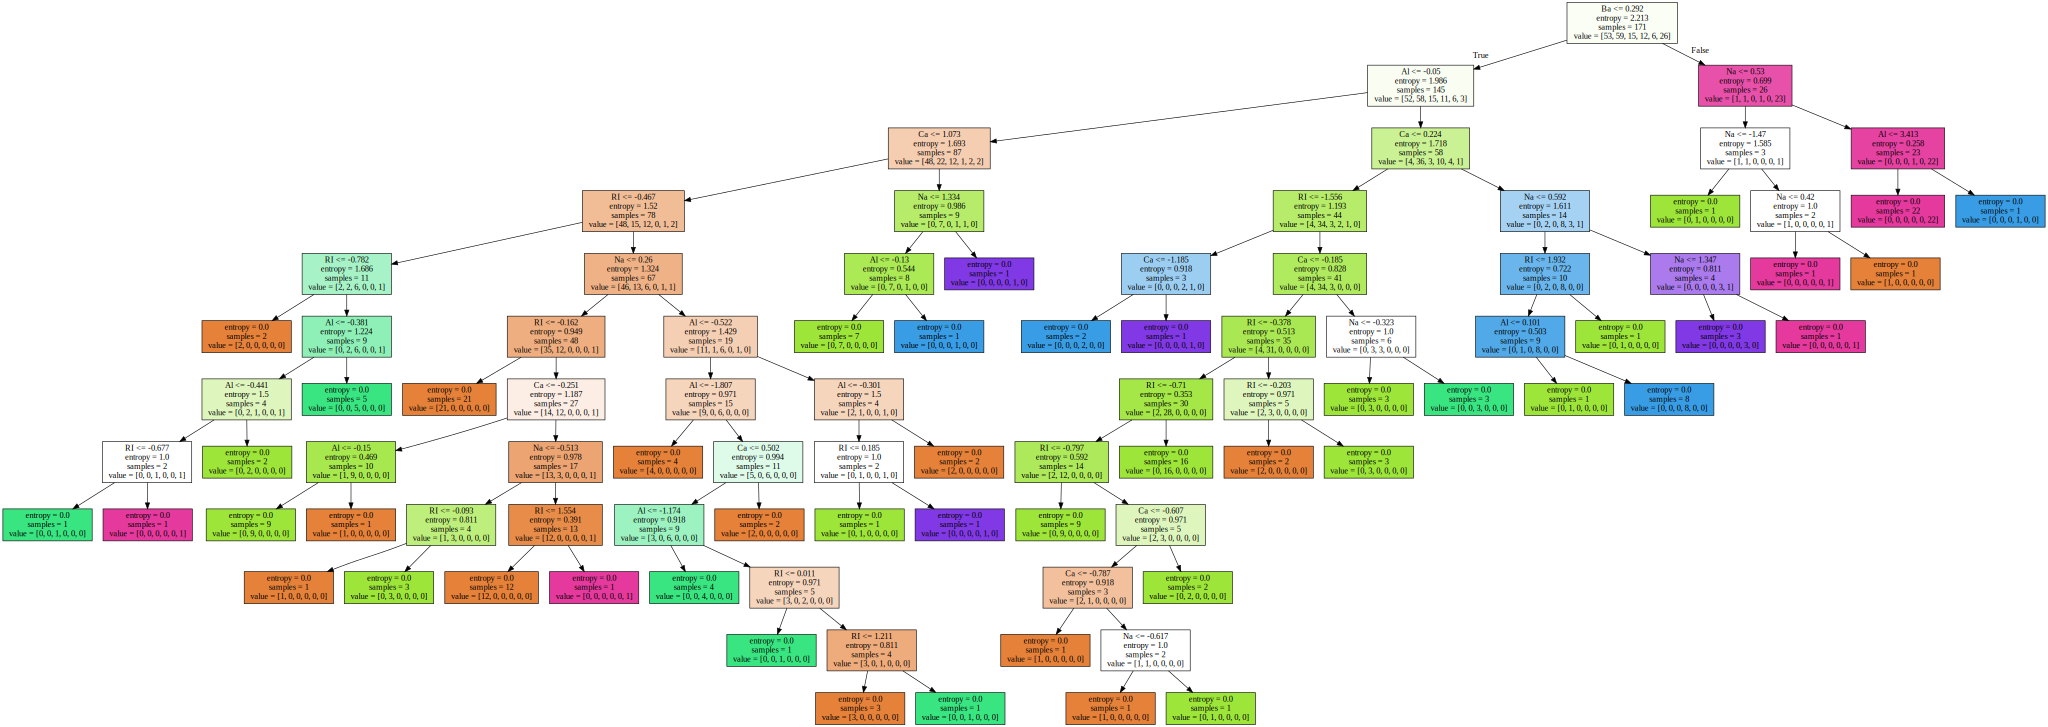

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [78]:
graph = Source(tree.export_graphviz(dt
      , out_file=None
      , feature_names=xTrain.columns
      , filled = True))
   
display(SVG(graph.pipe(format='svg')))
#return estimator

inter=interactive(dt
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)